In [181]:
import matplotlib.pyplot as plt
import darwin
import pandas as pd
from importlib import reload
import salem
reload(salem)
reload(darwin)

<module 'darwin' from '/home/ben/projects/darwin/darwin.py'>

In [192]:
var = 'prcp'
experiment = 'rc_trop_ls_MM'
year = 1516

In [193]:
if "ls_prcp" in locals():
    del ls_prcp
files = darwin.glob_measurements()

ls_prcp = darwin.open_experiment(
    experiment=experiment, 
    variable = var,
    year = str(year),
    engine="xarray",
    decode_cf=True
)

Getting variable name translations
Adding measurements to dataset


Getting variable name translations


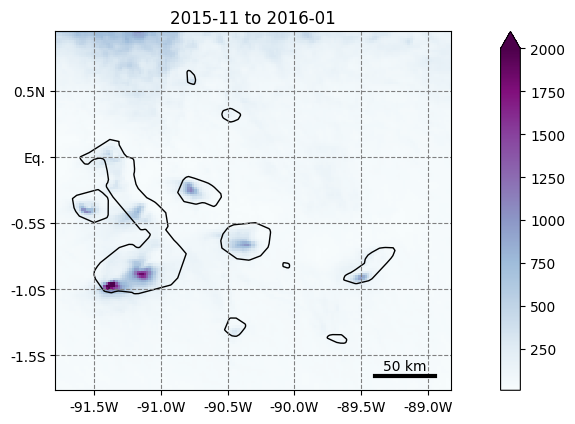

In [194]:
reload(darwin)
fig, ax = plt.subplots(figsize=(6,5))
# ls_prcp.plot_map(ax=ax, )
# ls_prcp.add_extracted_simulated_points_from_file(f"/home/ben/projects/darwin/{var}_bil.csv")
# ls_prcp.plot_stations(save=True)
ls_prcp = ls_prcp.remove_boundaries(40)
ls_prcp.wrf_product = ls_prcp.wrf_product.loc[dict(time=slice('2015-11-01', '2016-01-30'))]
ls_prcp.plot_map(ax=ax, aggregation="sum", save=True, stations=False, vmax=2000)
ax.set_title('2015-11 to 2016-01')
plt.savefig(f"{experiment}_prcp_map_{year}.png")
# del ls_prcp.wrf_product.attrs["PROJ_ENVI_STRING"]
# ls_prcp.wrf_product.salem.quick_map()
plt.show()

In [82]:
measured = pd.read_csv(f"/home/ben/projects/darwin/{var}_nn.csv", index_col=0)
measured.head()

,minasrojas,militar,puertoayora,puertovillamil,puertobaccerizomoreno,eljunco,lagalapaguera,cuevadesucre,negra,crocker,rosa
datetime,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
ls_prcp.wrf_product

<xarray.Dataset>
Dimensions:      (time: 365, west_east: 165, south_north: 150)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31
  * west_east    (west_east) float32 -1.64e+05 -1.62e+05 ... 1.62e+05 1.64e+05
  * south_north  (south_north) float32 -1.94e+05 -1.92e+05 ... 1.02e+05 1.04e+05
    lon          (south_north, west_east) float32 ...
    lat          (south_north, west_east) float32 ...
Data variables:
    prcp         (time, south_north, west_east) float32 0.001336 ... nan
Attributes: (12/41)
    TITLE:             DARWIN rc
    DATA_NOTES:        File generated with the output of successive model run...
    WRF_VERSION:        OUTPUT FROM WRF V4.3.3 MODEL
    CREATED_BY:        Benjamin Schmidt - benjamin.schmidt@tu-berlin.de
    INSTITUTION:       Technische Universität Berlin, Institut für Ökologie, ...
    CREATION_DATE:     26.01.2023 16:07:26
    ...                ...
    TRUELAT1:          2.0
    pyproj_srs:        +k_0=1.0 +units=m +lat_0=2.0 +lon_0=-90.31006622 +x_0=...
    experiment:        rc_trop_ls_MM
    frequency:         d02km
    dimensionality:    2d
    year:              2022

<AxesSubplot: xlabel='datetime'>

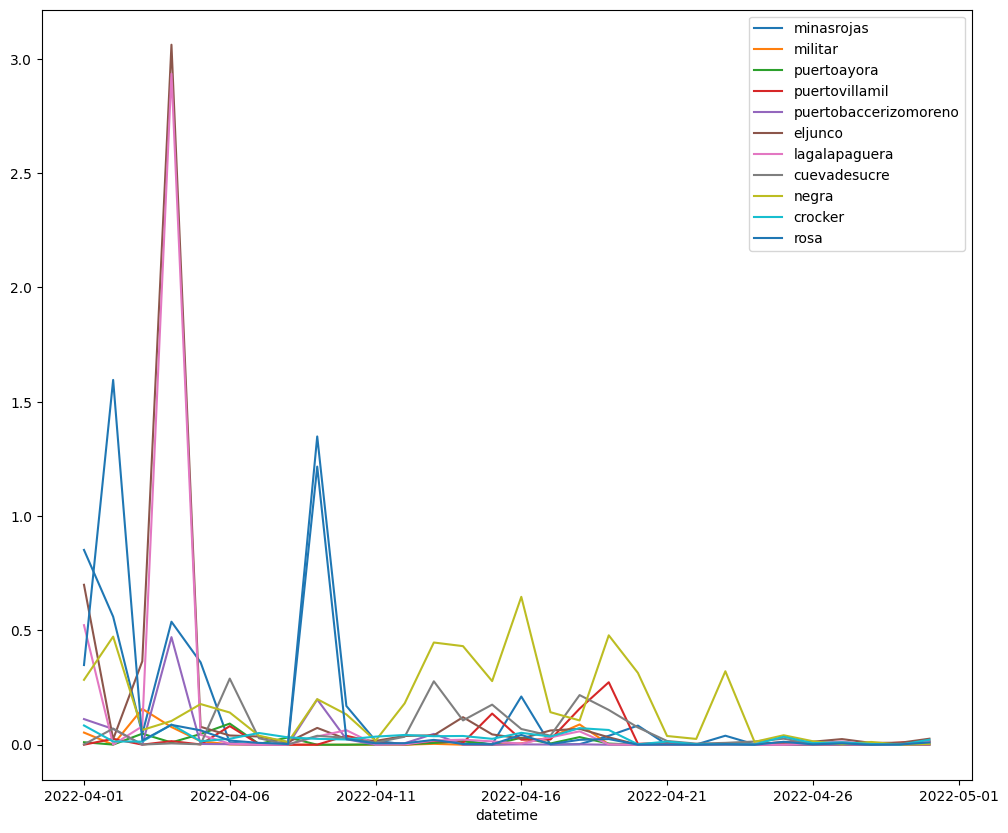

In [84]:
_, ax = plt.subplots(figsize=(12, 10))
measured.plot(ax=ax)
# plt.savefig('stations_extracted_q2.png')

In [85]:
'+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_data.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-09-30']
ds.head()

,T,RH,SLR,WS,WD,PCP_diff_radar,ST,Vwc
datetime,,,,,,,,
2022-04-01 06:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01 07:00:00,23.832300,99.475384,182.03254,0.91,355.3,0.0,26.041498,0.27560
2022-04-01 07:10:00,24.625802,98.594600,215.44146,0.89,6.8,0.0,26.043188,0.27561
2022-04-01 07:20:00,25.181004,97.965312,244.82952,0.74,1.2,0.0,26.047958,0.27555
2022-04-01 07:30:00,25.628998,97.157608,277.85944,0.46,290.5,0.0,26.058050,0.27499


In [86]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [87]:
files = darwin.glob_measurements()
files

['/home/ben/data/darwin_measured/09_AWS-PSantaRosa_data.csv',
 '/home/ben/data/darwin_measured/28_AWS-PMilitar_data.csv',
 '/home/ben/data/darwin_measured/20_AWS-PElJunco_data.csv',
 '/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_data.csv',
 '/home/ben/data/darwin_measured/30_AWS-PMinasRojas_data.csv',
 '/home/ben/data/darwin_measured/24_AWS-PPuertoVillamil_data.csv',
 '/home/ben/data/darwin_measured/18_AWS-PLaGalapaguera_data.csv',
 '/home/ben/data/darwin_measured/22_AWS-PPuertoBaquerizoMoreno_data.csv',
 '/home/ben/data/darwin_measured/16_AWS-PCuevadeSucre_data.csv',
 '/home/ben/data/darwin_measured/11_AWS-PCerroCrocker_data.csv',
 '/home/ben/data/darwin_measured/14_AWS-PSierraNegra_data.csv']

In [88]:
import pandas as pd
ds = pd.read_csv("/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_data.csv", parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [89]:
import xarray as xr
def open_dataset(file, pyproj_srs='+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'):
    ds = xr.open_dataset(
        file,
        decode_cf=False
    )
    split = file.split('/')[-1].split('_')
    var = split[-2]
    if var == 'lu':
        var = split[-2] + '_' + split[-1].split('.')[0]
    ds[var].attrs['pyproj_srs'] = pyproj_srs
    return ds

In [90]:
reload(darwin)
ds = darwin.WrfDataset(ds)

AttributeError: module 'darwin' has no attribute 'WrfDataset'

In [91]:
from metpy.calc import relative_humidity_from_mixing_ratio
from metpy.units import units

version = 'rc_trop_ls_MM'
year= '2022'
q2 = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_q2_{year}.nc")
t2 = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_t2_{year}.nc")
psfc = open_dataset(f"/home/ben/data/GAR/{version}/{version}_d02km_d_2d_psfc_{year}.nc")
q2 = q2["q2"] * units("kg/kg")
t2 = t2["t2"] * units("K")
psfc_da = psfc["psfc"] * units("mbar")

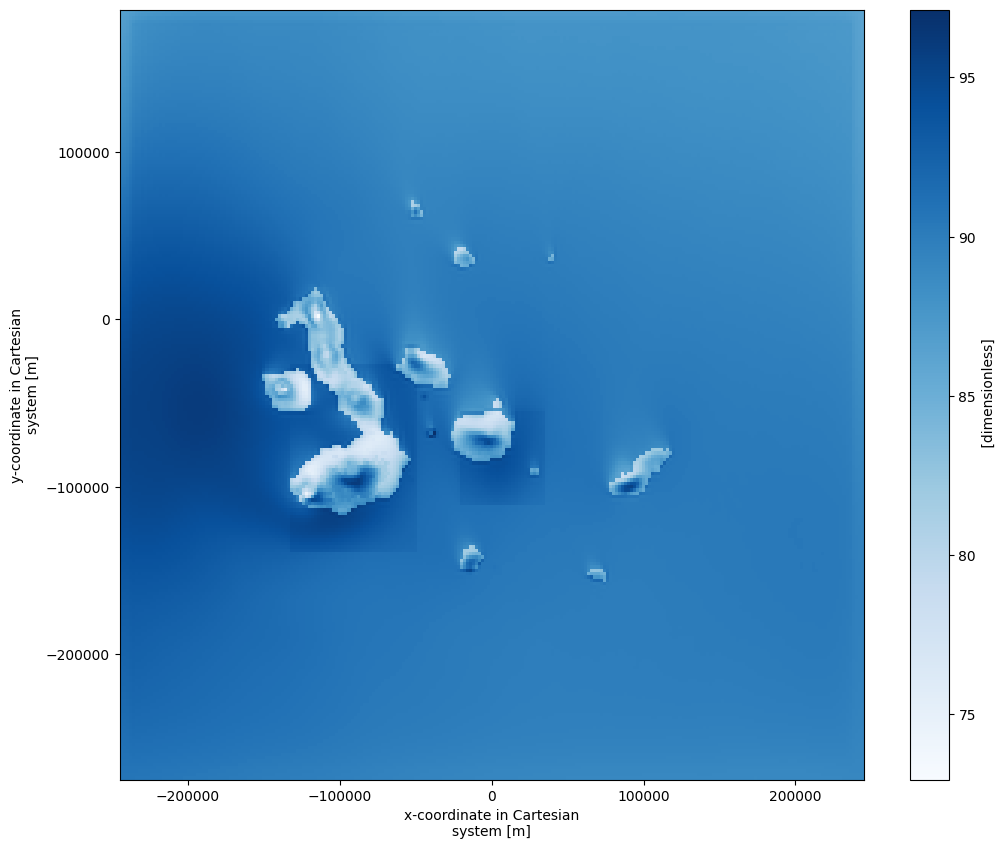

In [92]:
rh = relative_humidity_from_mixing_ratio(psfc_da, t2, q2)
fig, ax = plt.subplots(figsize=(12, 10))
rh.mean(dim="time", skipna=True, keep_attrs=True).plot(ax=ax, cmap="Blues")
ax.xlabel=""
ax.ylabel=""
plt.savefig("rc_trop_ls_rh_map.png")
plt.show()

In [93]:
rh.name = 'rh'
rh= psfc.merge(rh)

In [95]:
rh.rh.attrs = rh.psfc.attrs

In [94]:
rh = rh.drop_vars(psfc)
rh.attrs['VARNAME'] = 'rh'
rh.to_netcdf('/home/ben/data/GAR/rc_trop_ls_MM/rc_trop_ls_MM_d02km_d_2d_rh_2022.nc')

In [96]:
reload(darwin)
ls_hgt = darwin.open_experiment(
    from_path = '/home/ben/data/GAR/rc_trop_ls_vert43/',
    engine="xarray",
    decode_cf=True
)

/home/ben/.pyenv/versions/darwin/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/ben/.pyenv/versions/darwin/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/ben/.pyenv/versions/darwin/lib/python3.10/site-packages/xarray/backends/plugins.py:148: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/ben/.pyenv/versions/darwin/lib/python3.10/site-packages/xarray/backends/plugins.py:148: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/ben/.pyenv/versions/darwin/lib/python3.10/site-packages/xarray/backends/plugins.py:148: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [67]:
# hgt = ls_hgt.remove_boundaries(20)
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

terrain = mpl.colormaps['terrain'].resampled(32)
custom_terrain = ListedColormap([
    terrain(0), 
    terrain(0.25), 
    terrain(0.35), 
    terrain(0.4), 
    terrain(0.45), 
    terrain(0.5), 
    terrain(0.55),
    terrain(0.6),
    terrain(0.65),
    terrain(0.7), 
    terrain(0.75),
    terrain(0.8)
])

hgt = salem.open_wrf_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/static/rc_trop_ls_d10km_static_hgt.nc")
fig, ax = plt.subplots(figsize=(12, 10))
hgt.where(hgt.hgt > 1, -151).salem.quick_map('hgt', cmap=custom_terrain)
# hgt.salem.quick_map('hgt', cmap=custom_terrain)
plt.savefig('terrain.png')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/ben/data/GAR/rc_trop_ls/products/d02/static/rc_trop_ls_d10km_static_hgt.nc'

In [68]:
grid = salem.grid_from_dataset(hgt)
smap = salem.Map(grid)
smap.set_rgb(natural_earth='hr')

# smap.set_lonlat_contours(interval=0)
smap.set_scale_bar()
fig, ax = plt.subplots()
smap.visualize(ax=ax, addcbar=False)

smap.set_cmap('terrain')
smap.append_colorbar(ax=ax)
smap.set_data(hgt.where(hgt.hgt > 1, np.nan).to_array())
smap.visualize(ax=ax, title='WRF model topography')
plt.show()

NameError: name 'hgt' is not defined